<a href="https://colab.research.google.com/github/daniela0729/talento-tech/blob/main/Limpieza_de_datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/dataset_banco.csv"
data =  pd.read_csv(ruta)


Mounted at /content/drive


In [3]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
# inf sobre el df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [6]:
# conteo de los niveles por diferentes columnas
cols_cat =['job','marital','education','default','housing',
           'loan','contact', 'month','poutcome','y']


for col in cols_cat:

  print(f'columna {col}: {len(data[col].unique())} subniveles')

columna job: 18 subniveles
columna marital: 6 subniveles
columna education: 10 subniveles
columna default: 2 subniveles
columna housing: 2 subniveles
columna loan: 6 subniveles
columna contact: 5 subniveles
columna month: 12 subniveles
columna poutcome: 6 subniveles
columna y: 2 subniveles


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#devuelve un lista de las columnas
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
#media del atributo¨pdays: dias de contacto al usuario antes de la campaña
media= data ['pdays']. mean()

print("promedio de dias de contacto:",media)

promedio de dias de contacto: 40.17822461123277


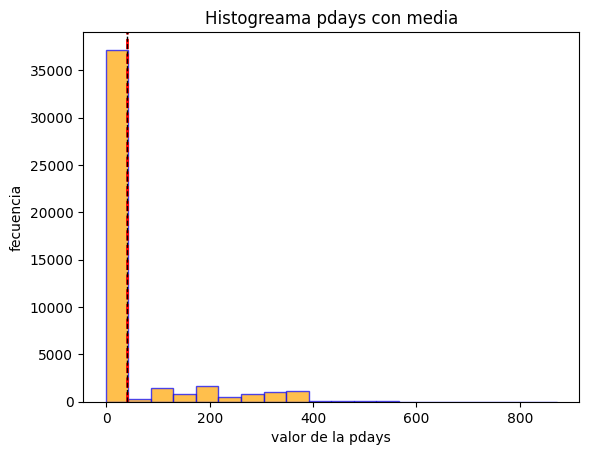

In [10]:
#Histograma de atributo
plt.hist(data['pdays'], bins=20, color='orange', edgecolor='blue', alpha=0.7)

# linea vertical indicado media
plt.axvline(data['pdays'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)

# etiqueta de titulo
plt.xlabel('valor de la pdays')
plt.ylabel('fecuencia')
plt.title('Histogreama pdays con media')

# mostrar grafica
plt.show()




In [11]:
#desviacion_estandar del atributo¨pdays: dias de contacto al usuario antes de la campaña
desviacion_estandar= data ['pdays'].std()

print("desviacion estandar de pdays:",desviacion_estandar)

desviacion estandar de pdays: 100.10328306134589


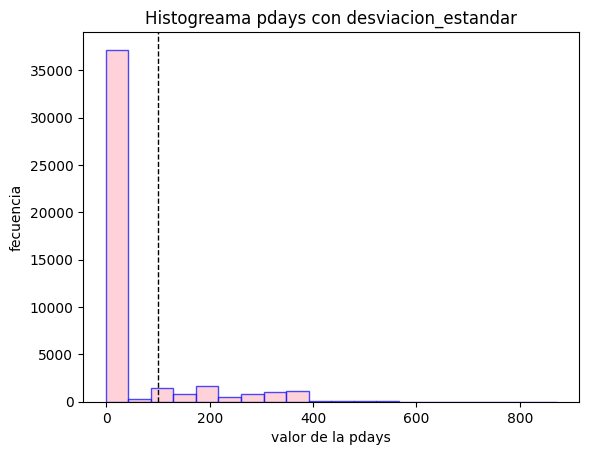

In [12]:
#Histograma de atributo
plt.hist(data['pdays'], bins=20, color='pink', edgecolor='blue', alpha=0.7)

# linea vertical indicado media
plt.axvline(desviacion_estandar, color='black', linestyle='dashed' ,linewidth=1)

# etiqueta de titulo
plt.xlabel('valor de la pdays')
plt.ylabel('fecuencia')
plt.title('Histogreama pdays con desviacion_estandar')

# mostrar grafica
plt.show()

In [13]:
#count -1
count= data['pdays'].value_counts()[-1]

print(count)

36953


In [14]:
# filas repetidas
print(f'tamaño antes de eliminar filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'tamaño del set desùes de eliminar filas:{data.shape}')

tamaño antes de eliminar filas repetidas: (45207, 17)
tamaño del set desùes de eliminar filas:(45203, 17)


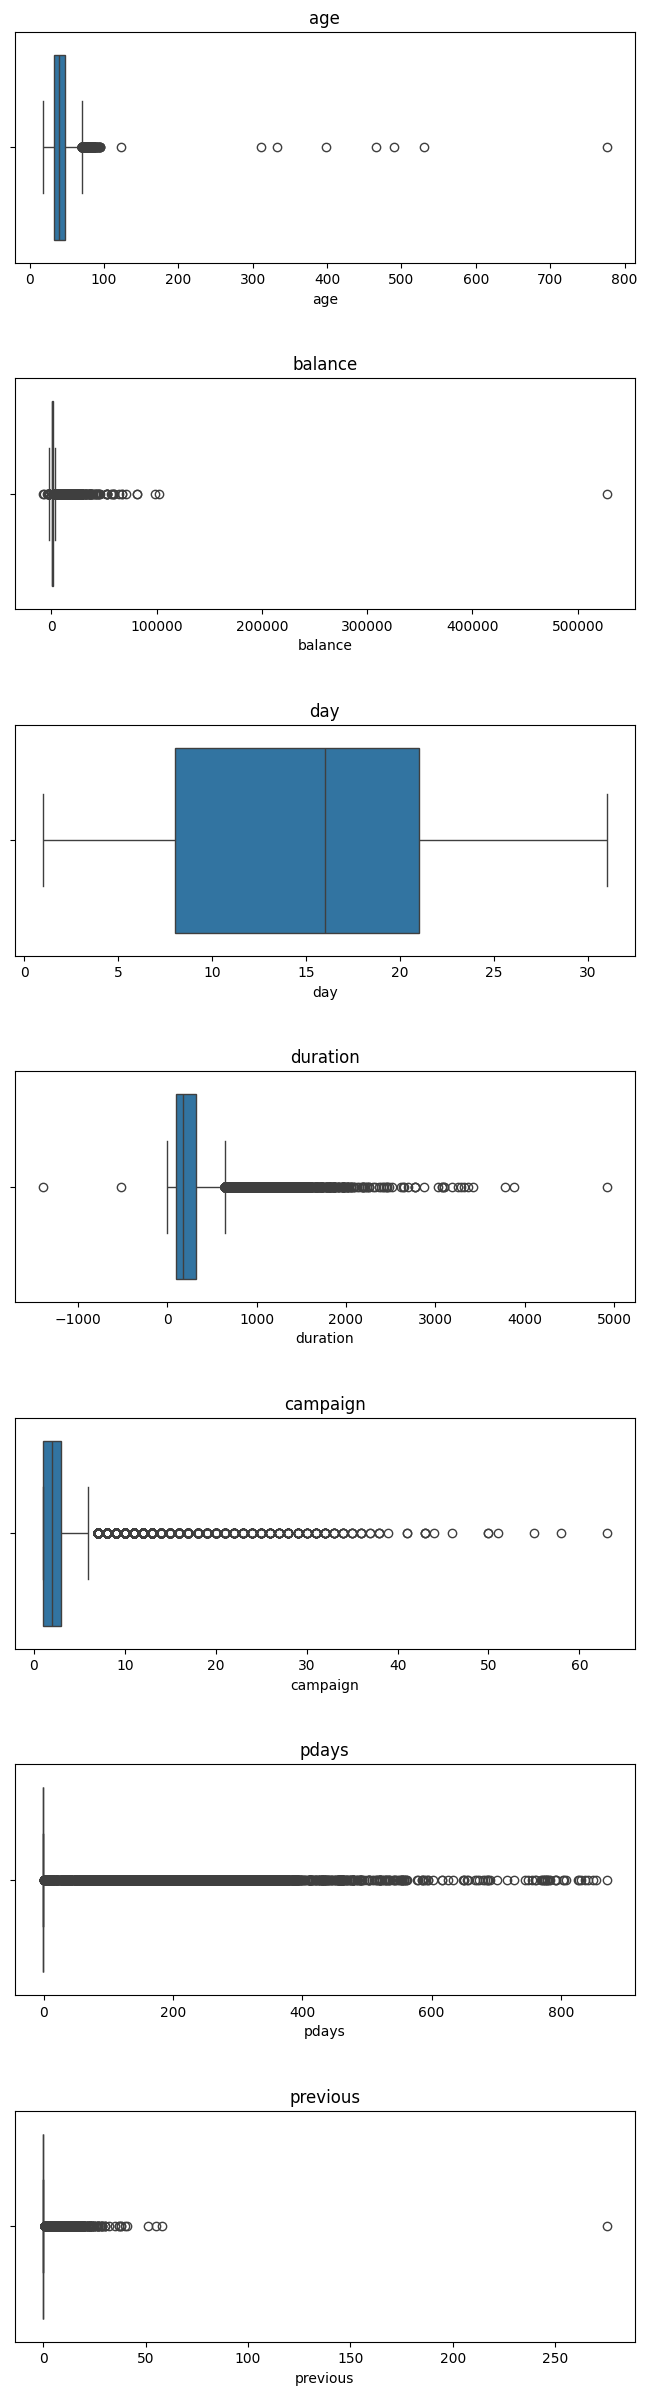

In [38]:
#graficas individuales
cols_num =['age','balance','day','duration','campaign',
           'pdays', 'previous']

fig, ax =plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace= 0.5)

for i, col in enumerate (cols_num):
     sns.boxplot(x= col, data=data, ax=ax[i])
     ax[i].set_title(col)